Below is a sample of ELT(Extract,Load and Transformation) of random data, from Uber drivers CSV data to store sales data and 
plotting housing sale prices against the size of the lots areas. I have used a number of tools and libraries such as seaborn to contruct a boxplot/pairplot. etc.
I have more for visualization but I thought this would be a good start to give you an Idea of what am already exposed to. 
Thank you Krishna for reading through, looking forward to chatting with you soon.

In [1]:
from pandas import read_csv

In [2]:
#read the imported uber drives data now
import pandas as pd
#import numpy as np
df = pd.read_csv("Uber Drives 2016.csv")

In [3]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [4]:
df.head

<bound method NDFrame.head of            START_DATE*         END_DATE* CATEGORY*            START*  \
0       1/1/2016 21:11    1/1/2016 21:17  Business       Fort Pierce   
1        1/2/2016 1:25     1/2/2016 1:37  Business       Fort Pierce   
2       1/2/2016 20:25    1/2/2016 20:38  Business       Fort Pierce   
3       1/5/2016 17:31    1/5/2016 17:45  Business       Fort Pierce   
4       1/6/2016 14:42    1/6/2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                 STOP*   MILES*         PURPOSE*  
0          Fort Pierce      5.1   Meal/Entertain  
1  

In [5]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [7]:
df["START*"].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Stonewater            1
Mountain View         1
Seattle               1
Sunnyside             1
Lakeview              1
Name: START*, Length: 177, dtype: int64

In [8]:
df.iloc[0:5, [0,3]]

,START_DATE*,START*
0,1/1/2016 21:11,Fort Pierce
1,1/2/2016 1:25,Fort Pierce
2,1/2/2016 20:25,Fort Pierce
3,1/5/2016 17:31,Fort Pierce
4,1/6/2016 14:42,Fort Pierce


In [9]:
df.shape

(1156, 7)

In [10]:
df.iloc[:, : -1]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7
...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2


In [11]:
df.loc[:, "START*"]

0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
              ...       
1151             Kar?chi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
1155                 NaN
Name: START*, Length: 1156, dtype: object

GROUPBY SUMMARIES:
see below:

In [12]:
df.groupby("START*")["MILES*"].agg("mean")

START*
Agnew                2.775000
Almond              15.200000
Apex                 5.341176
Arabi               17.000000
Arlington            4.900000
                      ...    
West University      2.200000
Weston               4.000000
Westpark Place       2.182353
Whitebridge          4.020588
Winston Salem      133.600000
Name: MILES*, Length: 177, dtype: float64

In [13]:
df.groupby("START*")["MILES*"].mean()

START*
Agnew                2.775000
Almond              15.200000
Apex                 5.341176
Arabi               17.000000
Arlington            4.900000
                      ...    
West University      2.200000
Weston               4.000000
Westpark Place       2.182353
Whitebridge          4.020588
Winston Salem      133.600000
Name: MILES*, Length: 177, dtype: float64

In [14]:
df.groupby(["START*", "STOP*"]).agg(["mean", "sum"]).head(20)

MILES*       
                                                           mean    sum
START*                    STOP*                                       
Agnew                     Agnew                        2.200000    2.2
                          Cory                         4.300000    4.3
                          Renaissance                  2.300000    4.6
Almond                    Bryson City                 15.200000   15.2
Apex                      Apex                         2.150000    4.3
                          Cary                         5.792308   75.3
                          Eagle Rock                   2.200000    2.2
                          Holly Springs                9.000000    9.0
Arabi                     Metairie                    17.000000   17.0
Arlington                 Washington                   4.900000    4.9
Arlington Park at Amberly Lexington Park at Amberly    1.300000    1.3
Asheville                 Mebane                     195.900000  195.9
                          Topton                      91.800000   91.8
Austin                    Katy                       136.000000  136.0
Banner Elk                Banner Elk                   6.680000   33.4
                          Boone                       15.100000   15.1
                          Elk Park                    22.400000   22.4
                          Newland                     28.100000   28.1
Bellevue                  Seattle                     12.900000   12.9
Berkeley                  El Cerrito                   2.300000    2.3

In [15]:
df= df.iloc[:-1,:]
df.tail()
df["START-DATE*"] = pd.to_datetime(df["START_DATE*"])
df.dtypes

C:\Users\micha\anaconda3-home\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


START_DATE*            object
END_DATE*              object
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
START-DATE*    datetime64[ns]
dtype: object

In [16]:
#find the most recent & the earliest travelled date and mean distance travel for each city?
res = df.groupby("START*").agg({"MILES*": ["mean"], "START_DATE*": ["min", "max"]})
res.reset_index(inplace = True)
res


START*      MILES*       START_DATE*                  
                            mean               min               max
0              Agnew    2.775000   11/4/2016 21:04   11/6/2016 10:50
1             Almond   15.200000  10/30/2016 12:58  10/30/2016 12:58
2               Apex    5.341176   1/29/2016 21:21   8/10/2016 19:47
3              Arabi   17.000000   6/25/2016 10:50   6/25/2016 10:50
4          Arlington    4.900000    8/2/2016 11:51    8/2/2016 11:51
..               ...         ...               ...               ...
172  West University    2.200000   3/10/2016 14:39   3/16/2016 18:43
173           Weston    4.000000    3/5/2016 12:57    6/5/2016 15:57
174   Westpark Place    2.182353   11/2/2016 15:45   8/12/2016 18:56
175      Whitebridge    4.020588    1/19/2016 9:09    8/9/2016 14:20
176    Winston Salem  133.600000  10/28/2016 18:13  10/28/2016 18:13

[177 rows x 4 columns]

In [17]:
res.columns = ["START_CITY*", "AVG_DIST", "EARLIEST_TRIP", "RECENT_TRIP"]
res

,START_CITY*,AVG_DIST,EARLIEST_TRIP,RECENT_TRIP
0,Agnew,2.775000,11/4/2016 21:04,11/6/2016 10:50
1,Almond,15.200000,10/30/2016 12:58,10/30/2016 12:58
2,Apex,5.341176,1/29/2016 21:21,8/10/2016 19:47
3,Arabi,17.000000,6/25/2016 10:50,6/25/2016 10:50
4,Arlington,4.900000,8/2/2016 11:51,8/2/2016 11:51
...,...,...,...,...
172,West University,2.200000,3/10/2016 14:39,3/16/2016 18:43
173,Weston,4.000000,3/5/2016 12:57,6/5/2016 15:57
174,Westpark Place,2.182353,11/2/2016 15:45,8/12/2016 18:56
175,Whitebridge,4.020588,1/19/2016 9:09,8/9/2016 14:20


In [18]:
from pandas import read_csv

In [19]:
#read the imported data now
import pandas as pd
#import numpy as np
dfjames = pd.read_csv("store_sales.csv")

In [20]:
dfjames.head()

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,S_1,Texas,8,20,13,21,17,20,24,17,16,9,7,6
1,S_2,California,12,19,15,15,11,19,7,15,10,11,21,19
2,S_3,California,16,16,14,19,23,6,13,13,15,14,24,8
3,S_4,Texas,8,18,13,10,14,14,6,8,8,18,7,11
4,S_5,Texas,19,5,24,9,5,24,10,5,24,15,6,13


In [21]:
#calculate the average sales for january.
dfjames["Jan"].mean()

14.46

In [22]:
#show the mean of sales for each month of the year
dfjames.apply("mean")

Jan     14.46
Feb     15.09
Mar     14.56
Apr     14.57
May     13.56
Jun     13.80
July    14.38
Aug     15.81
Sep     14.91
Oct     14.10
Nov     15.31
Dec     13.57
dtype: float64

In [23]:
# find sales that are greator then 10 and assigned them as eligible else not eligible.
#Add new column to the dataset call Jan_bonus and store the eligible values in Jan_bonus.
import numpy as np
def bonus_func(sales_col):
    elig_values = np.where(sales_col >10, "eligible", "not eligible")
    return elig_values
dfjames["Jan_bonus"] = bonus_func(dfjames["Jan"])
dfjames

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec,Jan_bonus
0,S_1,Texas,8,20,13,21,17,20,24,17,16,9,7,6,not eligible
1,S_2,California,12,19,15,15,11,19,7,15,10,11,21,19,eligible
2,S_3,California,16,16,14,19,23,6,13,13,15,14,24,8,eligible
3,S_4,Texas,8,18,13,10,14,14,6,8,8,18,7,11,not eligible
4,S_5,Texas,19,5,24,9,5,24,10,5,24,15,6,13,eligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S_96,Texas,7,10,20,20,10,15,15,21,15,7,23,22,not eligible
96,S_97,California,13,6,7,15,22,10,21,23,10,6,12,9,eligible
97,S_98,Texas,16,9,6,14,20,13,11,10,8,22,17,22,eligible
98,S_99,Arizona,18,16,9,5,12,22,11,13,21,17,19,10,eligible


In [24]:
newdf =dfjames.select_dtypes(include = ['int64', 'float64']).apply(bonus_func)
newdf

,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,not eligible
1,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,eligible,not eligible,eligible,eligible,eligible
2,eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,eligible,not eligible
3,not eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible,not eligible,eligible,not eligible,eligible
4,eligible,not eligible,eligible,not eligible,not eligible,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible
...,...,...,...,...,...,...,...,...,...,...,...,...
95,not eligible,not eligible,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible
96,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible,eligible,not eligible
97,eligible,not eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible
98,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible


In [25]:
newdf.tail()

,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
95,not eligible,not eligible,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible
96,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible,eligible,not eligible
97,eligible,not eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible
98,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible
99,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible


In [26]:
dfjames.head()

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec,Jan_bonus
0,S_1,Texas,8,20,13,21,17,20,24,17,16,9,7,6,not eligible
1,S_2,California,12,19,15,15,11,19,7,15,10,11,21,19,eligible
2,S_3,California,16,16,14,19,23,6,13,13,15,14,24,8,eligible
3,S_4,Texas,8,18,13,10,14,14,6,8,8,18,7,11,not eligible
4,S_5,Texas,19,5,24,9,5,24,10,5,24,15,6,13,eligible


In [27]:
#concatenate two datasets(dfjames and newdf) horizontally and name it dfAchuil
dfAchuil = pd.concat([dfjames,newdf], axis = 1)
dfAchuil

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,...,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,S_1,Texas,8,20,13,21,17,20,24,17,...,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,not eligible
1,S_2,California,12,19,15,15,11,19,7,15,...,eligible,eligible,eligible,eligible,not eligible,eligible,not eligible,eligible,eligible,eligible
2,S_3,California,16,16,14,19,23,6,13,13,...,eligible,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,eligible,not eligible
3,S_4,Texas,8,18,13,10,14,14,6,8,...,eligible,not eligible,eligible,eligible,not eligible,not eligible,not eligible,eligible,not eligible,eligible
4,S_5,Texas,19,5,24,9,5,24,10,5,...,eligible,not eligible,not eligible,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S_96,Texas,7,10,20,20,10,15,15,21,...,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible
96,S_97,California,13,6,7,15,22,10,21,23,...,not eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible,eligible,not eligible
97,S_98,Texas,16,9,6,14,20,13,11,10,...,not eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible
98,S_99,Arizona,18,16,9,5,12,22,11,13,...,not eligible,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible


In [28]:
dfAchuil.shape

(100, 27)

In [29]:
dfAchuil.tail()

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,...,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
95,S_96,Texas,7,10,20,20,10,15,15,21,...,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible
96,S_97,California,13,6,7,15,22,10,21,23,...,not eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible,eligible,not eligible
97,S_98,Texas,16,9,6,14,20,13,11,10,...,not eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible
98,S_99,Arizona,18,16,9,5,12,22,11,13,...,not eligible,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible
99,S_100,California,5,23,17,24,15,21,19,10,...,eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible


In [30]:
dfAchuil["Jan"]

,Jan,Jan
0,8,not eligible
1,12,eligible
2,16,eligible
3,8,not eligible
4,19,eligible
...,...,...
95,7,not eligible
96,13,eligible
97,16,eligible
98,18,eligible


In [31]:
import pandas as pd
years= [90, 91, 92, 93, 94, 95]
f1 = {90:8, 91:9, 92:7, 93:8, 94:9, 95:11}
firm1 = pd.Series(f1, index=years)
print(firm1)
f2 = {90:14, 92:9, 93:13, 94:5}
firm2 = pd.Series(f2, index=years)
firm2
f3 = {93:10, 94:12, 95: 13}
firm3 = pd.Series(f3, index=years)
firm3
df3 = pd.DataFrame(columns=['Firm1','Firm2','Firm3'],index=years)
df3
df3.Firm1 = firm1
df3.Firm2 = firm2
df3.Firm3 = firm3
df3


90     8
91     9
92     7
93     8
94     9
95    11
dtype: int64


,Firm1,Firm2,Firm3
90,8,14.0,NaN
91,9,NaN,NaN
92,7,9.0,NaN
93,8,13.0,10.0
94,9,5.0,12.0
95,11,NaN,13.0


In [32]:
firm2.dropna()

90    14.0
92     9.0
93    13.0
94     5.0
dtype: float64

In [33]:
df3.dropna()

,Firm1,Firm2,Firm3
93,8,13.0,10.0
94,9,5.0,12.0


In [34]:
cleandf3 = df3.dropna(axis=1)
cleandf3

,Firm1
90,8
91,9
92,7
93,8
94,9
95,11


In [35]:
thresholddf = df3.dropna(axis=1,thresh=2)   #define threshold for row having >= 2 NaN,
print(thresholddf)
df3

    Firm1  Firm2  Firm3
90      8   14.0    NaN
91      9    NaN    NaN
92      7    9.0    NaN
93      8   13.0   10.0
94      9    5.0   12.0
95     11    NaN   13.0


,Firm1,Firm2,Firm3
90,8,14.0,NaN
91,9,NaN,NaN
92,7,9.0,NaN
93,8,13.0,10.0
94,9,5.0,12.0
95,11,NaN,13.0


In [36]:
fillna5 = df3.fillna(0)   #Replace NaN with 0 instead.
fillna5

,Firm1,Firm2,Firm3
90,8,14.0,0.0
91,9,0.0,0.0
92,7,9.0,0.0
93,8,13.0,10.0
94,9,5.0,12.0
95,11,0.0,13.0


In [37]:
fillna4 = df3.fillna(df3.mean())  # subsitute empty values with mean of the firm in concern
fillna4

,Firm1,Firm2,Firm3
90,8,14.00,11.666667
91,9,10.25,11.666667
92,7,9.00,11.666667
93,8,13.00,10.000000
94,9,5.00,12.000000
95,11,10.25,13.000000


In [38]:
#numpy is a numerical python. Numpy is special data structure library in python.
import numpy as np

In [39]:
from numpy import array
from numpy import arange

In [40]:
dist = np.array('distance')
spd = np.array('speed')
print(dist)
print(spd)

distance
speed


In [41]:
C = np.arange(10)  #arrange function as a sequence or counter for upto 10 digits.
print('array:          ', C)
print()
print()

array:           [0 1 2 3 4 5 6 7 8 9]




In [42]:
onemorearray =np.linspace(1.10,30)  #linspace function here creates 11 evenly spaced numbers.
print ('onemorearray:      ', onemorearray)

onemorearray:       [ 1.1         1.68979592  2.27959184  2.86938776  3.45918367  4.04897959
  4.63877551  5.22857143  5.81836735  6.40816327  6.99795918  7.5877551
  8.17755102  8.76734694  9.35714286  9.94693878 10.53673469 11.12653061
 11.71632653 12.30612245 12.89591837 13.48571429 14.0755102  14.66530612
 15.25510204 15.84489796 16.43469388 17.0244898  17.61428571 18.20408163
 18.79387755 19.38367347 19.97346939 20.56326531 21.15306122 21.74285714
 22.33265306 22.92244898 23.5122449  24.10204082 24.69183673 25.28163265
 25.87142857 26.46122449 27.05102041 27.64081633 28.23061224 28.82040816
 29.41020408 30.        ]


In [43]:
np.zeros(50)    # make a 50, 0 numbered single dimensional array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
np.zeros((3,5)) + 6       # Make a 15, 0 number two dimensional array

array([[6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6.]])

In [45]:
np.ones(30) + 7   # Make a 30, 1 number single dimensional array.

array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])

In [46]:
np.eye(5)       # creat 5*5 identity matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [48]:
housing = pd.read_csv("housing_prices.csv")

In [49]:
housing.shape

(1460, 81)

In [50]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
housing.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [52]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

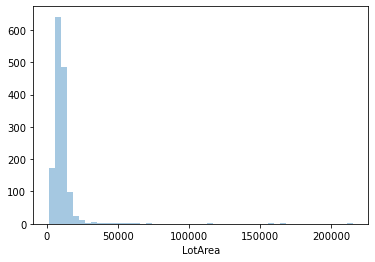

In [53]:
#Analyze the spread of the "lot Area" column # Kernal density estimates(Kde)
sns.distplot(housing["LotArea"], kde=False);

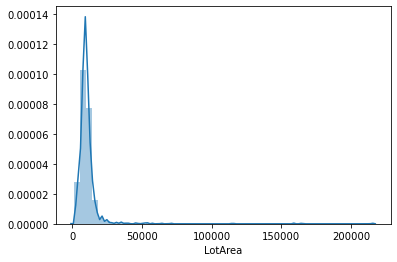

In [54]:
sns.distplot(housing["LotArea"], kde=True);

In [55]:
# What are the different types of housing exterios, Please james plot, a Bar chart below for housing.

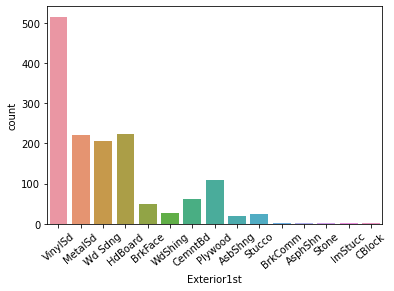

In [56]:
plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

In [57]:
# Bi-Variate analysis.
# does the price of the house depend on the lot Area?

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

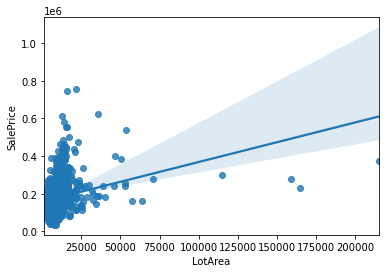

In [58]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)

In [59]:
# Are outliers showing the relationship between sales-price and lotarea? Show the the relationship percentile

In [60]:
housing["LotArea"].quantile([0.5,0.95,0.99])

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

In [61]:
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

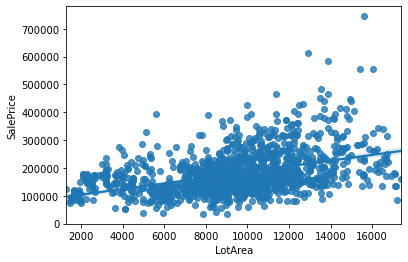

In [62]:
sns.regplot(x = "LotArea", y = "SalePrice", data= housing_sub)

In [63]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]

In [64]:
len(sf_cols)
sf_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


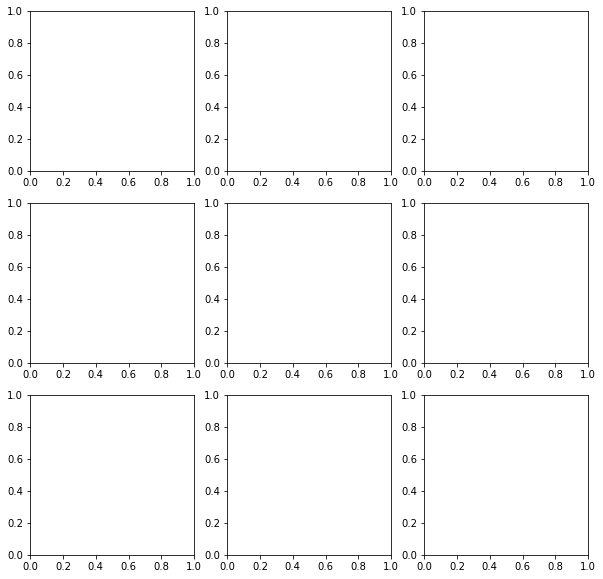

In [65]:
fig, axs = plt.subplots(nrows= 3, ncols =3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i //3
    cols = i % 3
    print(rows, cols)

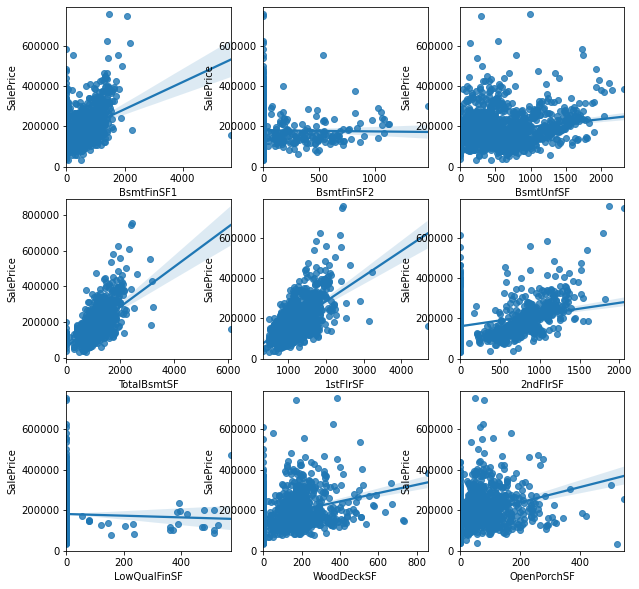

In [66]:
fig, axs = plt.subplots(nrows= 3, ncols =3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i //3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.regplot(x =sf_cols[i], y = "SalePrice", data = housing, ax=ax)

In [67]:
#below is example of Descriptive statistics.
#Remember there are 3 types of statistics, 1.Descriptive, 2.Predictive, 3. Prescriptive.

In [68]:
import numpy as np
import pandas as pd

In [69]:
#Now load the Cardio dataset 

myCardio = pd.read_csv('CardioGoodFitness.csv')
mydata = myCardio

In [70]:
myCardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [71]:
myCardio.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [72]:
myCardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [73]:
myCardio.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


<AxesSubplot:xlabel='Gender', ylabel='Age'>

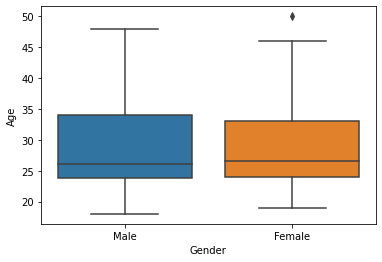

In [74]:
#plot a boxplot for both Gender by age.

import seaborn as sns
sns.boxplot(x="Gender", y="Age", data=myCardio)

In [75]:
pd.crosstab(mydata['Product'], mydata['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [76]:
pd.crosstab(mydata['Product'], mydata['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot:xlabel='Product', ylabel='count'>

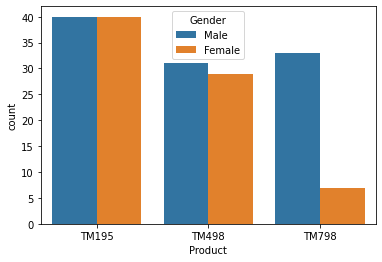

In [77]:
sns.countplot(x="Product", hue="Gender", data=mydata)

In [78]:
#plot pivot table of the above dataset in countplot

pd.pivot_table(mydata, index=['Product', 'Gender'], columns=['MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

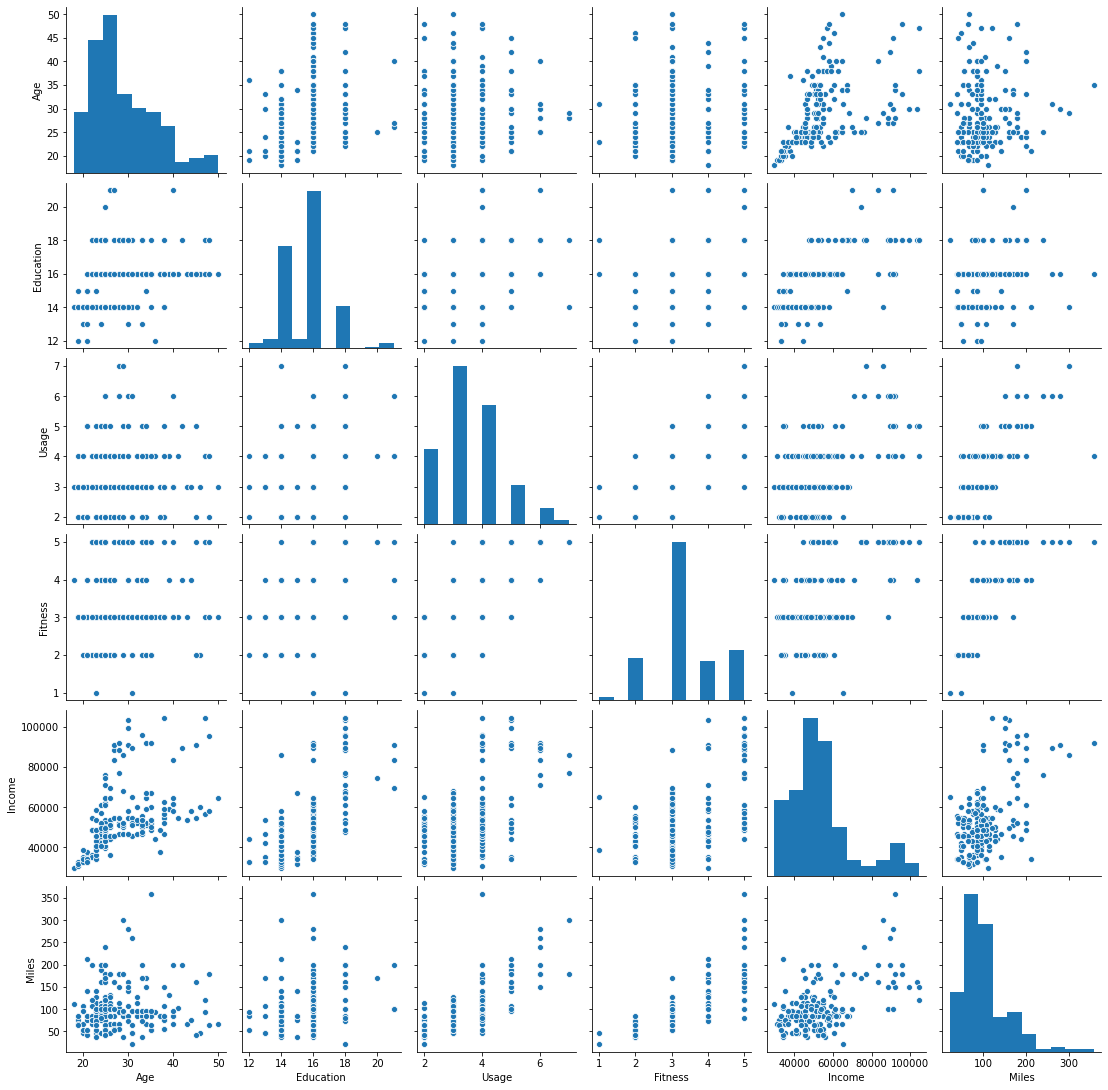

In [79]:
#simple pairplot of the whole dataframe. it shows the graphs for data mapping.

sns.pairplot(mydata)

In [80]:
mydata['Age'].std

<bound method Series.std of 0      18
1      19
2      19
3      19
4      20
       ..
175    40
176    42
177    45
178    47
179    48
Name: Age, Length: 180, dtype: int64>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

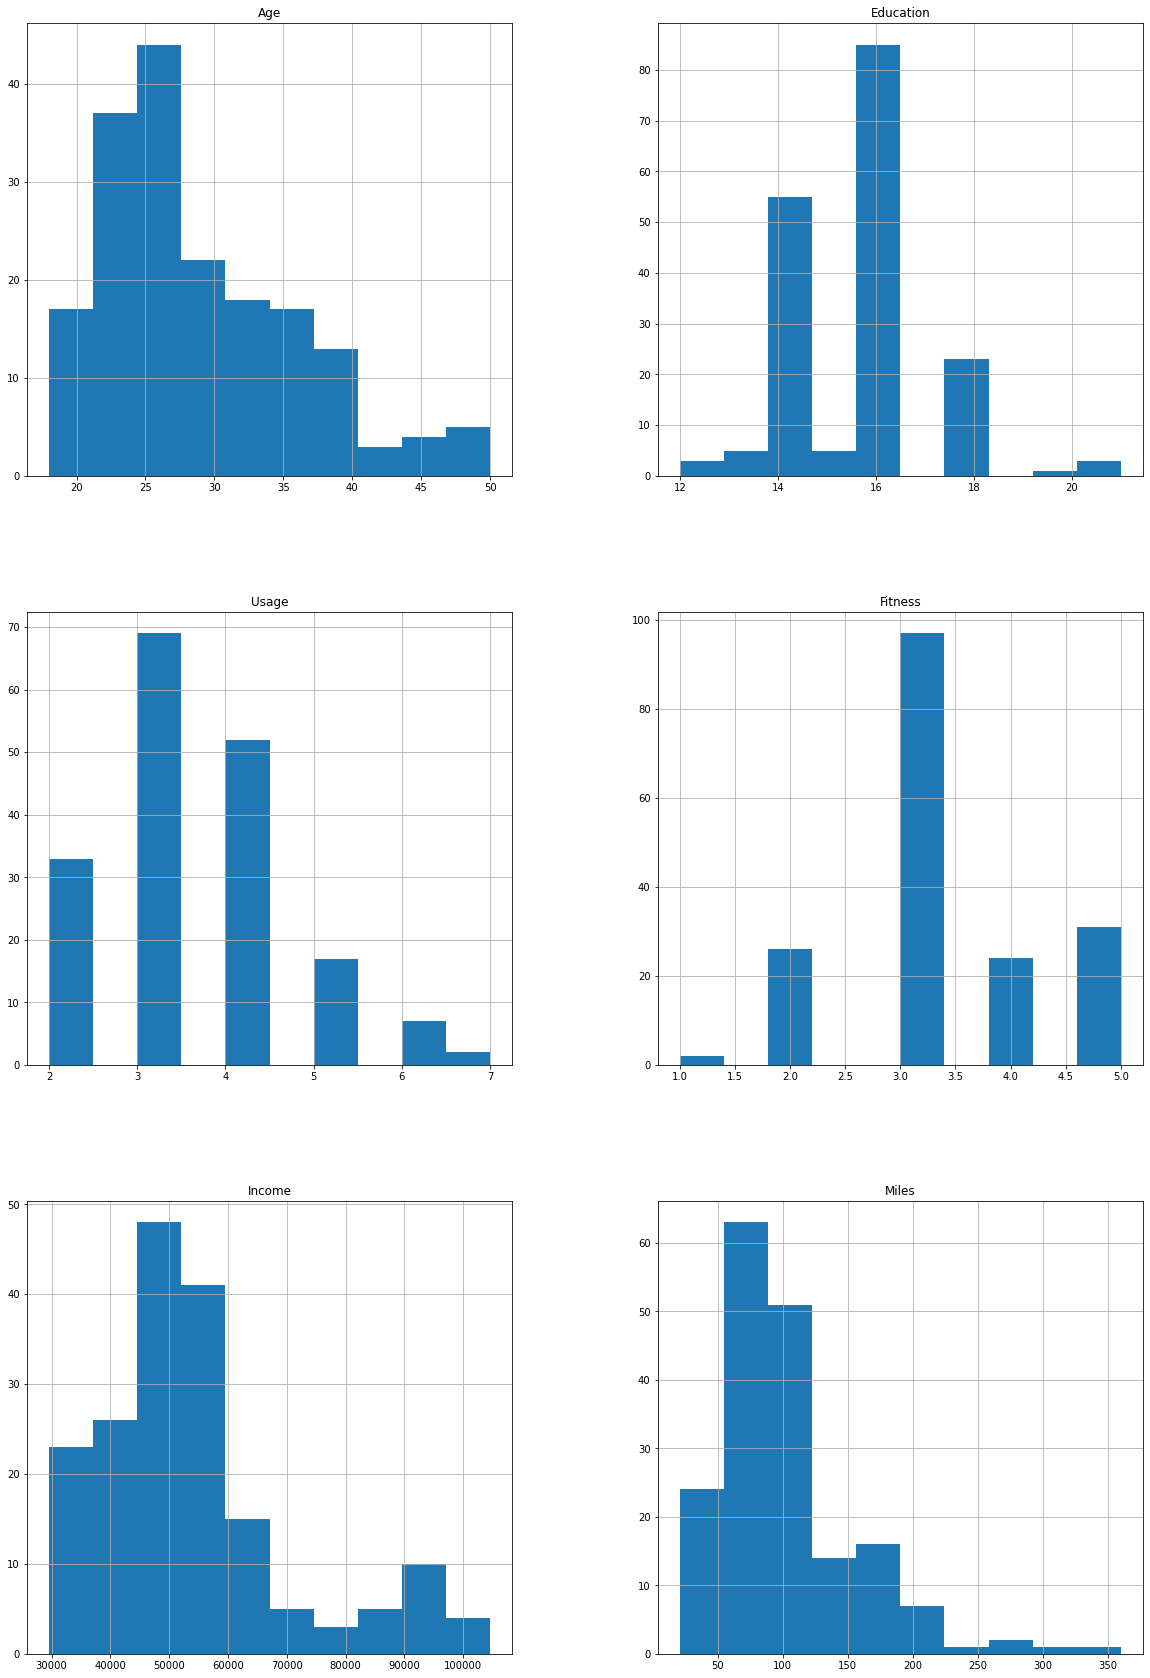

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(20,30))

Next is reinforcement learning

In [82]:
# data wrangling with Python

#store name in Variable
name = 'James Achuil'
a, b, c = 1, 2, 3

In [83]:
print(a)

1


In [84]:
print(name)

James Achuil


In [85]:
#SLicing example

letters = 'ABCDEFGH'
print(letters[2:6])

CDEF
